In [74]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [62]:
df = pd.read_csv("/content/Hospital_Management.csv")
df.head()

,Patient_ID,Patient_Name,Patient_Age,Patient_Address,Doctor_Name,Doctor_Age,Room_Type,Staff_Name,Billing,Pharmacy,Equipment_Type,Hospital_Rating,Hospital_Type,Hospital_Address,Feedback,InPatient,Hospital_Performance,Hospital_Fees
0,1,Mohammed,21,AhmedaGeneral,Dr.Amit,32,ICU,Ram,Cash,InHouse,Diagnostic Tools,1,General,AhmedaGeneral,Bad,1,Bad,15000
1,2,Sunita,22,Surat,Dr.Vikas,41,ICU,Raj,Card,Retail,Treatment Equipment,2,Specialized,Surat,Bad,0,Bad,1300
2,3,Amit,38,Rajkot,Dr.Shivani,39,Private,Shyam,Card,Compounding,Surgical Equipment,5,Private,Rajkot,Excellent,0,Good,12000
3,4,Anita,47,Vadodara,Dr.Ajit,58,Private,Megha,Insurance,Mail Order,Treatment Equipment,4,Private,Vadodara,Average,1,Good,1350
4,5,Santosh,14,Mumbai,Dr.Vikram,64,Private,Riya,Cash,Compounding,Surgical Equipment,3,General,Mumbai,Good,1,Bad,1225


In [15]:
df.shape

(250, 18)

In [16]:
df.describe()

,Patient_ID,Patient_Age,Doctor_Age,Hospital_Rating,InPatient,Hospital_Fees
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,125.500000,43.808000,49.016000,3.144000,0.568000,5794.320000
std,72.312977,20.590557,14.125646,1.457312,0.496348,6580.407613
min,1.000000,11.000000,24.000000,0.000000,0.000000,500.000000
25%,63.250000,26.000000,38.000000,2.000000,0.000000,1360.000000
50%,125.500000,38.500000,48.500000,3.000000,1.000000,2600.000000
75%,187.750000,60.000000,58.000000,4.000000,1.000000,9350.000000
max,250.000000,99.000000,87.000000,5.000000,1.000000,30000.000000


In [13]:
df.columns

Index(['Patient_ID', 'Patient_Name', 'Patient_Age', 'Patient_Address',
       'Doctor_Name', 'Doctor_Age', 'Room_Type', 'Staff_Name', 'Billing',
       'Pharmacy', 'Equipment_Type', 'Hospital_Rating', 'Hospital_Type',
       'Hospital_Address', 'Feedback', 'InPatient', 'Hospital_Performance',
       'Hospital_Fees'],
      dtype='object')

In [15]:
df = df.fillna(0)

,Patient_ID,Patient_Name,Patient_Age,Patient_Address,Doctor_Name,Doctor_Age,Room_Type,Staff_Name,Billing,Pharmacy,Equipment_Type,Hospital_Rating,Hospital_Type,Hospital_Address,Feedback,InPatient,Hospital_Performance,Hospital_Fees
0,1,Mohammed,21,AhmedaGeneral,Dr.Amit,32,ICU,Ram,Cash,InHouse,Diagnostic Tools,1,General,AhmedaGeneral,Bad,1,Bad,15000
1,2,Sunita,22,Surat,Dr.Vikas,41,ICU,Raj,Card,Retail,Treatment Equipment,2,Specialized,Surat,Bad,0,Bad,1300
2,3,Amit,38,Rajkot,Dr.Shivani,39,Private,Shyam,Card,Compounding,Surgical Equipment,5,Private,Rajkot,Excellent,0,Good,12000
3,4,Anita,47,Vadodara,Dr.Ajit,58,Private,Megha,Insurance,Mail Order,Treatment Equipment,4,Private,Vadodara,Average,1,Good,1350
4,5,Santosh,14,Mumbai,Dr.Vikram,64,Private,Riya,Cash,Compounding,Surgical Equipment,3,General,Mumbai,Good,1,Bad,1225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Vanya,78,Gandhidham,Dr.Rishima,47,Semi-Private,Usha,Cash,Retail,Treatment Equipment,0,Private,Bengaluru,Bad,1,Bad,18000
246,247,Priya,22,Surat,Dr.Jai,31,General,Asha,Card,InHouse,Surgical Equipment,4,Specialized,Ujjain,Good,1,Good,5000
247,248,Chandrakant,41,Lucknow,Dr.Nikhil,36,ICU,Rajesh,Card,Retail,Treatment Equipment,4,Specialized,Vadodara,Good,1,Good,17000
248,249,Shreya,64,Delhi,Dr.Tejas,60,Semi-Private,Ashok,Insurance,Mail Order,Diagnostic Tools,4,General,Jodhpur,Excellent,1,Good,12000


In [16]:
df.count()

Patient_ID              250
Patient_Name            250
Patient_Age             250
Patient_Address         250
Doctor_Name             250
Doctor_Age              250
Room_Type               250
Staff_Name              250
Billing                 250
Pharmacy                250
Equipment_Type          250
Hospital_Rating         250
Hospital_Type           250
Hospital_Address        250
Feedback                250
InPatient               250
Hospital_Performance    250
Hospital_Fees           250
dtype: int64

In [33]:
df[(df['Patient_Age']>30)&
 (df['Billing']=='Cash')&
  (df['Hospital_Type']=='General')].head()

,Patient_ID,Patient_Name,Patient_Age,Patient_Address,Doctor_Name,Doctor_Age,Room_Type,Staff_Name,Billing,Pharmacy,Equipment_Type,Hospital_Rating,Hospital_Type,Hospital_Address,Feedback,InPatient,Hospital_Performance,Hospital_Fees
41,42,Sita,73,Godhra,Dr.Neel,48,ICU,Kaushal,Cash,Retail,Treatment Equipment,5,General,Godhra,Good,1,Good,6800
105,106,Kandarb,45,Ahmedabad,Dr.Dev,32,ICU,Dakshesh,Cash,Compounding,Treatment Equipment,4,General,Ahmedabad,Average,1,Good,5000
114,115,Vaedansh,42,Ahmedabad,Dr.Dev,42,ICU,Naman,Cash,Retail,Diagnostic Tools,3,General,Ahmedabad,Average,1,Bad,30000
120,121,Disha,82,Mumbai,Dr.Shila,71,Private,Rakesh,Cash,Compounding,Diagnostic Tools,4,General,Mumbai,Average,1,Good,800
126,127,kiran,45,Banglore,Dr.Nirav,47,Private,Mohan,Cash,InHouse,Diagnostic Tools,4,General,Banglore,Good,1,Good,500


In [34]:
df[(df['Patient_Age']>30)&
 (df['Billing']=='Cash')&
  (df['Hospital_Type']=='Private')].head()

,Patient_ID,Patient_Name,Patient_Age,Patient_Address,Doctor_Name,Doctor_Age,Room_Type,Staff_Name,Billing,Pharmacy,Equipment_Type,Hospital_Rating,Hospital_Type,Hospital_Address,Feedback,InPatient,Hospital_Performance,Hospital_Fees
14,15,Suresh,37,Bharuch,Dr.Aman,52,Private,Ashok,Cash,InHouse,Diagnostic Tools,1,Private,Bharuch,Average,1,Bad,1500
18,19,Abdul,69,AhmedaGeneral,Dr.Gyan,56,ICU,Suresh,Cash,Compounding,Surgical Equipment,3,Private,AhmedaGeneral,Average,0,Bad,1225
30,31,Rakesh,73,Mumbai,Dr.Hemant,41,ICU,Naresh,Cash,InHouse,Surgical Equipment,4,Private,Mumbai,Excellent,0,Good,1300
40,41,Ajit,31,Dahod,Dr.Meet,47,ICU,Tanmay,Cash,InHouse,Diagnostic Tools,2,Private,Dahod,Average,1,Bad,1200
47,48,Lalit,77,Ahmedabad,Dr.Anjali,56,Operation Room,Animesh,Cash,Mail Order,Surgical Equipment,5,Private,Ahmedabad,Excellent,0,Good,1200


In [55]:
df[(df['Doctor_Age']>=24)& (df['Hospital_Performance']=='Good')&(df['Hospital_Fees']<2000)].head(10)

,Patient_ID,Patient_Name,Patient_Age,Patient_Address,Doctor_Name,Doctor_Age,Room_Type,Staff_Name,Billing,Pharmacy,Equipment_Type,Hospital_Rating,Hospital_Type,Hospital_Address,Feedback,InPatient,Hospital_Performance,Hospital_Fees
3,4,Anita,47,Vadodara,Dr.Ajit,58,Private,Megha,Insurance,Mail Order,Treatment Equipment,4,Private,Vadodara,Average,1,Good,1350
9,10,Raju,19,Chennai,Dr.Shyam,38,Private,Sanjay,Card,InHouse,Treatment Equipment,5,General,Chennai,Good,0,Good,1360
10,11,Ashok,18,Pune,Dr.Subhash,34,Isolation,Sunil,Cash,InHouse,Diagnostic Tools,5,Specialized,Pune,Good,1,Good,1860
11,12,Rekha,11,Mohali,Dr.Abhay,47,Operation Room,Rajesh,Insurance,Retail,Diagnostic Tools,4,Private,Mohali,Average,1,Good,1750
16,17,Lakshmi,49,Surat,Dr.Naresh,67,Operation Room,Manoj,Card,InHouse,Surgical Equipment,5,General,Surat,Good,1,Good,1450
19,20,Mohan,83,Ahmedabad,Dr.Manjeet,69,Isolation,Vijay,Insurance,Mail Order,Diagnostic Tools,4,General,Ahmedabad,Excellent,1,Good,500
24,25,Suman,38,Surat,Dr.Uday,60,Semi-Private,Kiran,Insurance,Mail Order,Diagnostic Tools,5,General,Surat,Average,0,Good,1860
30,31,Rakesh,73,Mumbai,Dr.Hemant,41,ICU,Naresh,Cash,InHouse,Surgical Equipment,4,Private,Mumbai,Excellent,0,Good,1300
38,39,Urmila,44,Dahod,Dr.Ronak,38,Isolation,Dinesh,Card,Retail,Diagnostic Tools,5,Private,Dahod,Good,0,Good,800
46,47,Ravi,33,Ahmedabad,Dr.Nitin,76,Isolation,Viral,Card,InHouse,Treatment Equipment,4,Specialized,Ahmedabad,Excellent,1,Good,800


In [57]:
df[(df['Doctor_Age']>=24)& (df['Hospital_Performance']=='Bad')&(df['Hospital_Fees']>2000)].head(10)

,Patient_ID,Patient_Name,Patient_Age,Patient_Address,Doctor_Name,Doctor_Age,Room_Type,Staff_Name,Billing,Pharmacy,Equipment_Type,Hospital_Rating,Hospital_Type,Hospital_Address,Feedback,InPatient,Hospital_Performance,Hospital_Fees
0,1,Mohammed,21,AhmedaGeneral,Dr.Amit,32,ICU,Ram,Cash,InHouse,Diagnostic Tools,1,General,AhmedaGeneral,Bad,1,Bad,15000
7,8,Rajesh,69,HyderaGeneral,Dr.Vivek,71,Semi-Private,Dev,Cash,Mail Order,Treatment Equipment,2,Specialized,HyderaGeneral,Good,0,Bad,3000
8,9,Geeta,73,Bangalore,Dr.Arvinder,57,Semi-Private,Prem,Card,InHouse,Surgical Equipment,1,General,Bangalore,Good,1,Bad,2500
12,13,Manoj,32,Dahod,Dr.Satish,48,Semi-Private,Geeta,Card,Compounding,Diagnostic Tools,3,General,Dahod,Good,0,Bad,6800
17,18,Mohit,62,Rajkot,Dr.Raj,76,Semi-Private,Anil,Insurance,Retail,Treatment Equipment,2,Specialized,Rajkot,Bad,1,Bad,12000
26,27,Raj,14,Ahmedabad,Dr.Mira,42,Semi-Private,Mahesh,Cash,Retail,Diagnostic Tools,2,Private,Ahmedabad,Average,0,Bad,6800
28,29,Asha,42,Rajkot,Dr.Kirti,66,ICU,Mohan,Insurance,Retail,Diagnostic Tools,4,General,Rajkot,Good,1,Bad,3200
42,43,Rohan,19,Bharuch,Dr.Hitesh,44,ICU,Prerna,Card,Compounding,Surgical Equipment,2,Specialized,Bharuch,Average,0,Bad,30000
43,44,Sanjay,18,Gandhinagar,Dr.Arun,52,Private,Yash,Insurance,Mail Order,Treatment Equipment,3,General,Gandhinagar,Bad,1,Bad,13000
45,46,Mahendra,30,Rajkot,Dr.Vinita,67,Private,Vishwa,Card,Retail,Diagnostic Tools,3,General,Rajkot,Average,0,Bad,2500


In [21]:
df.groupby('Billing').count()

,Patient_ID,Patient_Name,Patient_Age,Patient_Address,Doctor_Name,Doctor_Age,Room_Type,Staff_Name,Pharmacy,Equipment_Type,Hospital_Rating,Hospital_Type,Hospital_Address,Feedback,InPatient,Hospital_Performance,Hospital_Fees
Billing,,,,,,,,,,,,,,,,,
Card,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77
Cash,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98
Insurance,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75


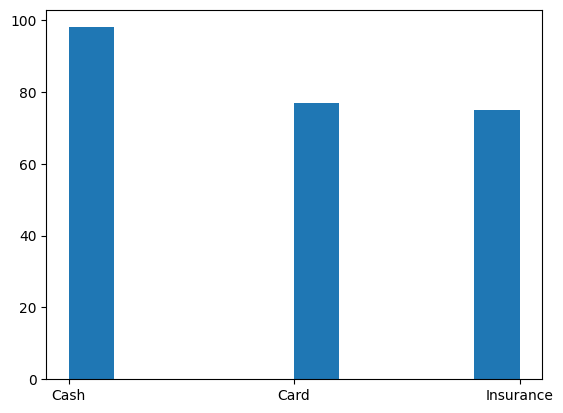

In [9]:
plt.hist(df['Billing'])
plt.show()

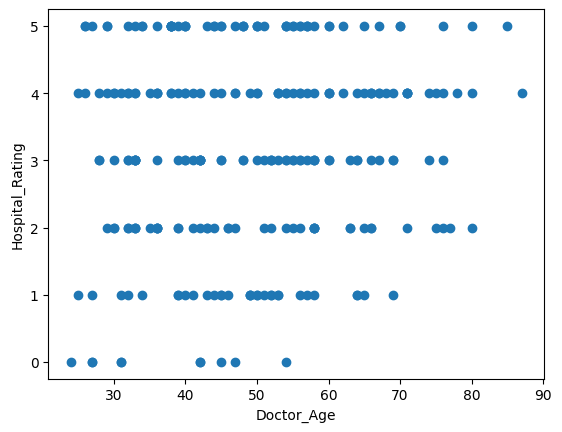

In [13]:
plt.ylabel('Hospital_Rating')
plt.xlabel('Doctor_Age')
plt.scatter(y = df['Hospital_Rating'], x = df['Doctor_Age'])
plt.show()

In [67]:
p_mapper = {"Excellent":1 ,"Average":2 ,"Good":3 ,"Bad":4 ,}
df['Feedback'] = df['Feedback'].replace(p_mapper)

In [68]:
pm_mapper = {"Good":1 ,"Bad":2 }
df['Hospital_Performance'] = df['Hospital_Performance'].replace(pm_mapper)

In [69]:
x = df[['Feedback','Hospital_Performance','Doctor_Age']]
y = df['Hospital_Fees']

In [70]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.2 , random_state = 0)


In [65]:
xtrain

,Hospital_Performance,Doctor_Age
71,Good,35
160,Bad,54
180,Good,56
75,Bad,63
59,Good,60
...,...,...
67,Bad,66
192,Bad,41
117,Good,66
47,Good,56


In [79]:
gnb = GaussianNB()
gnb.fit(xtrain,ytrain)
y_pred = gnb.predict(xtest)

In [88]:
from sklearn.metrics import classification_report , confusion_matrix

def classify_report(ytest,y_pred):
  cm = confusion_matrix(ytest,y_pred)
  print(cm)
  print(classification_report(ytest,y_pred))
